In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [6]:
import math
import string
import operator

## Empirical data on survivorship curves
Name:
Latin name: Daphnia magna
Tmax = 90 days
F10: 0.17
F50: 0.44
Source: Bas, Fig. 6.1, p. 217

Name: Mice
Latin name: Mus musculus
Tmax = 1100 days
F10:650/1100 = 0.59
F50:860/1100 = 0.78
Source: Bas, Fig. 6.2, p.217

Name:Pond snail
Latin name:Lymnaea stagnalis
Tmax = 680 days
F10: 180/680 = 0.26
F50: 325/680 = 0.48
Source: Bas, Fig. 6.4, p. 219

Name: Guppie
Latin name: Poecilia reticulata
Tmax = 1750
F10: 750/1750 = 0.43
F50:1125/1750 = 0.64
Source: Bas, Fig. 6.3, p. 218

Name: Partenogenic rotifer
Latin name: Philodina citrina
Tmax = 31 days
F10: 15/31 = 0.48
F50:22.5/31 = 0.73
Source: Tuck, Fig. 9.4, p. 484

Name: Humans
Latin name: Homo sapiens 
Tmax = 32000
F10:12000/32000 = 0.375
F50: 21250/32000 = 0.66
Source: Tuck, Fig. 1.1, p. 14

Name: Guppie
Latin name: Lebistes reticulatus (SAME SPECIES AS ABOVE?)
Tmax = 1750
F10:750/1750 = 0.43
F50:  1100/1750 = 0.63
Source: Tuck, Fig. 3.6, p. 138

Name: Nematode
Latin name: C.elegans
Tmax:  37 days
F10:  11/37 = 0.30
F50:  18/37 = 0.49
Source: Tuck, Fig. 6.1, p. 302

Name: Bowl and doily spider
Latin name: Frontinella pyramitela
DOES NOT WORK - damage 50% of 1-epsilon at Tmax = 100
Tmax = 140 (longest to be conservative concerning somatic damage)
F10: 46/140 = 0.33
F50: 92/140 = 0.66

Tmax = 65 (5 flies/week)
F10 = 30/65 = 0.46
F50 = 43/65 = 0.66
Source: Tuck, Fig. 2.7, p. 77

Name: Fruitfly
Latin name: D. melanogaster
Tmax: 120
F10: 29/120 = 0.24
F50: 60/120 = 0.5
Source: Tuck, Fig. 2.4, p. 64 (L/15C)

Name: Telostylinus angusticollis (Diptera: Neriidae)
Latin name: Telostylinus angusticollis (Diptera: Neriidae)
Tmax females: 65 days
F10 = 17/65 = 0.26
F50 = 38/65 = 0.58
Tmax males: 55 days
F10 = 23/55 = 0.41
F50 = 38/55 = 0.69
Source: Kawasaki et al (2008)
Plot the positions in a separate graph, with labels for the species. Adjust parameters so that the simulated points are in the same ballpark.

For each point, find where kappa = 0.06, alpha = ?, exp = ? gives approximately this point at T = 200. The the lower kappa valuers will give longer max lifespans. Can the F10,F50 point be maintained and the Tmax be just moved upwards? 

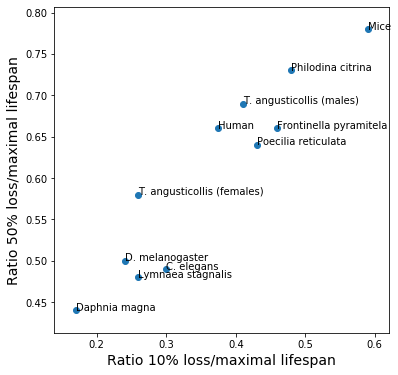

In [5]:
#plt.figure(figsize=(6,6)
x = [0.17,0.26,0.3,0.46,0.375,0.43,0.48,0.59,0.24,0.26,0.41]
y = [0.44,0.48,0.49,0.66,0.66,0.64,0.73,0.78,0.5,0.58,0.69]
n = ['Daphnia magna','Lymnaea stagnalis', 'C. elegans', 'Frontinella pyramitela','Human', 'Poecilia reticulata','Philodina citrina',
     'Mice','D. melanogaster','T. angusticollis (females)','T. angusticollis (males)']

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

#plt.plot(0.17,0.44,'o')
#plt.plot(0.59,0.78,'o')
#plt.plot(0.26,0.48,'o')
#plt.plot(0.43,0.64,'o')
#plt.plot(0.48,0.73,'o')
#plt.plot(0.375,0.66,'o')
#plt.plot(0.43,0.63,'o')
#plt.plot(0.3,0.49,'o')

#plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05','$\kappa$=0.06'))    
plt.ylabel("Ratio 50% loss/maximal lifespan",fontsize = 14)
plt.xlabel("Ratio 10% loss/maximal lifespan",fontsize=14);
#plt.savefig('RA_fig1.png', dpi = 600);

# Figure 1

#Data extracted from Kawasaki et al (2008)
# Females captivity: old extraction - dubious
#plt.plot(0, 1.0,'ro')
#plt.plot(17*100/23.4, 0.9,'ro')
#plt.plot(23*100/23.4, 0.8,'ro')
#plt.plot(32.5*100/23.4, 0.6,'ro')
#plt.plot(40*100/23.4, 0.4,'ro')
#plt.plot(47.5*100/23.4, 0.2,'ro')
#plt.plot(52*100/23.4, 0.1,'ro')
#plt.plot(65*100/23.4, 0.0,'ro')

# Females captivity: new extraction 18.12.20
plt.plot(0, 1.0,'ro')
plt.plot(325*(37/148), 0.9,'ro')
plt.plot(325*(52/148), 0.8,'ro')
plt.plot(325*(73.5/148), 0.6,'ro')
plt.plot(325*(91/148), 0.4,'ro')
plt.plot(325*(109/148), 0.2,'ro')
plt.plot(325*(120/148), 0.1,'ro')
plt.plot(325*(148/148), 0.0,'ro')

# Males captivity: new extraction 18.12.20
plt.plot(0, 1.0,'ro')
plt.plot(290*(49/131.5), 0.9,'ro')
plt.plot(290*(61/131.5), 0.8,'ro')
plt.plot(290*(78/131.5), 0.6,'ro')
plt.plot(290*(91/131.5), 0.4,'ro')
plt.plot(290*(104/131.5), 0.2,'ro')
plt.plot(290*(112/131.5), 0.1,'ro')
plt.plot(290*(131.5/131.5), 0.0,'ro')

#Females wild: new extraction per 20 Dec 2020
#plt.plot(0, 1.0,'bo')
#plt.plot(100*2/45, 0.8,'bo')
#plt.plot(100*4/45, 0.6,'bo')
#plt.plot(100*8/45, 0.4,'bo')
#plt.plot(100*14/45, 0.2,'bo')
#plt.plot(100*45/45, 0.0,'bo')

#Males wild: new extraction per 20 Dec 2020
#plt.plot(0, 1.0,'go')
#plt.plot(53*3/24, 0.8,'go')
#plt.plot(53*5/24, 0.6,'go')
#plt.plot(53*8.5/24, 0.4,'go')
#plt.plot(53*12/24, 0.2,'go')
#plt.plot(53*24/24, 0.0,'go') 

#Females wild: old extraction - looks ok
#Old ratio 0.0:0.2 = 20/6.41 = 3.12; New ratio: =.0:0.2 = 46/14.5 = 3.17
plt.plot(0, 1.0,'bo')
plt.plot(0.45*100/20, 0.9,'bo')
plt.plot(0.75*100/20, 0.8,'bo')
plt.plot(1.94*100/20, 0.6,'bo')
plt.plot(3.58*100/20, 0.4,'bo')
plt.plot(6.41*100/20, 0.2,'bo')
plt.plot(20*100/20, 0.0,'bo')

#Males wild: old extraction - looks ok
plt.plot(0, 1.0,'go')
plt.plot(0.746*55/11, 0.9,'go')
plt.plot(1.34*55/11, 0.8,'go')
plt.plot(2.68*55/11, 0.6,'go')
plt.plot(4.0*55/11, 0.4,'go')
plt.plot(5.6*55/11, 0.2,'go')
plt.plot(7.02*55/11, 0.1,'go')
plt.plot(11*55/11, 0.0,'go') 

In [109]:
#Fitting survivorship curves for captive female Telostylinus against Kawasaki et al (2018) data as a function of alpha and kappa
# Using same approach as for Frontinella
Tmax_C = 325 + 1 #to get hold of the Tmax day as the index starts at zero 

nind = 1000; 
nrepeats_mut = 100 #100

X_C = np.round([325*(37/148),325*(52/148),325*(73.5/148),325*(91/148),325*(109/148),325*(120/148),325*(148/148)])
X_C = X_C.astype(int)
Y_C = [0.9,0.8,0.6,0.4,0.2,0.1,0.0]
Y_C = [nind * i for i in Y_C]
fit_C = []

for alpha in np.arange(0.00285,0.00288,0.00001):
    for kappa in np.arange(0.00842,0.00845,0.00001):
        H1_mut_C = np.zeros((nrepeats_mut,Tmax_C),dtype = int)
        for k in range(nrepeats_mut):
            s = np.ones((Tmax_C,nind),dtype = int); 
            for j in range(1,Tmax_C):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        if ran < alpha*(((1+kappa)**(j+1))-1):
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut_C[k,:] = np.sum(s, axis = 1)
        mean_mut_C_F = np.mean(H1_mut_C,axis = 0)
        
        # Square distance with data point and sum
        sum_square = (mean_mut_C_F[X_C[0]]-Y_C[0])**2 + (mean_mut_C_F[X_C[1]]-Y_C[1])**2 + (mean_mut_C_F[X_C[2]]-Y_C[2])**2 + \
                    (mean_mut_C_F[X_C[3]]-Y_C[3])**2 + (mean_mut_C_F[X_C[4]]-Y_C[4])**2 + (mean_mut_C_F[X_C[5]]-Y_C[5])**2 + (mean_mut_C_F[X_C[6]]-Y_C[6])**2 
        
        # Store in array
        fit_C.append([alpha,kappa,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_C, key=operator.itemgetter(2))
print(*best_fits[0:10], sep = "\n")

[0.00287, 0.00842, 1207.775000000001]
[0.00288, 0.00844, 1208.904299999999]
[0.00286, 0.00844, 1218.5567999999992]
[0.00287, 0.00843, 1226.040899999998]
[0.00288, 0.00842, 1240.185999999999]
[0.00288, 0.00843, 1245.6371000000013]
[0.00286, 0.00843, 1282.562300000001]
[0.00286, 0.00842, 1369.0083000000006]
[0.00285, 0.00844, 1369.1307000000006]
[0.00285, 0.00843, 1387.1347999999998]


nrepeats = 100: #old indexing
for alpha in np.arange(0.00288,0.00297,0.00001):
    for kappa in np.arange(0.00837,0.00845,0.00001):
[0.0029600000000000004, 0.00839, 1032.8942000000006]
[0.0029600000000000004, 0.008409999999999999, 1046.9671000000005]
[0.0029300000000000003, 0.008429999999999998, 1051.6614999999995]
[0.0029400000000000003, 0.008419999999999999, 1058.9009000000003]
[0.0029400000000000003, 0.008429999999999998, 1067.1728999999993]
[0.0029500000000000004, 0.008409999999999999, 1068.7551000000008]
[0.0029500000000000004, 0.0084, 1078.7398]
[0.0029300000000000003, 0.008439999999999998, 1084.4613999999995]
[0.0029300000000000003, 0.008419999999999999, 1107.670200000001]
[0.0029500000000000004, 0.00839, 1120.3384999999992]

nrepeats = 100 #new indexing:
for alpha in np.arange(0.00278,0.00288,0.00001):
    for kappa in np.arange(0.00837,0.00845,0.00001):
[0.00288, 0.008439999999999998, 1158.8386999999982]
[0.00288, 0.0084, 1211.9399999999982]
[0.00286, 0.008439999999999998, 1212.2962999999993]
[0.00285, 0.008439999999999998, 1226.1284000000003]
[0.00287, 0.008429999999999998, 1239.3535000000015]
[0.00288, 0.008429999999999998, 1240.3997000000004]
[0.00287, 0.008409999999999999, 1242.1531999999993]
[0.00285, 0.008419999999999999, 1243.3076000000008]
[0.00288, 0.008419999999999999, 1268.5042999999982]
[0.00288, 0.008409999999999999, 1272.8041999999994]

nrepeats = 100: #new indexing
for alpha in np.arange(0.00288,0.00292,0.00001):
    for kappa in np.arange(0.00843,0.0085,0.00001):
[0.00288, 0.00843, 1105.5406999999996]
[0.00288, 0.00844, 1108.4816]
[0.00289, 0.00845, 1117.9725000000005]
[0.00288, 0.00845, 1130.0869000000016]
[0.0029000000000000002, 0.00844, 1139.3600999999994]
[0.00289, 0.00844, 1146.152400000001]
[0.0029000000000000002, 0.008469999999999998, 1163.2049000000013]
[0.0029000000000000002, 0.008489999999999998, 1165.3243999999988]
[0.0029100000000000003, 0.00845, 1174.8508999999995]
[0.0029100000000000003, 0.008479999999999998, 1183.9047999999993]

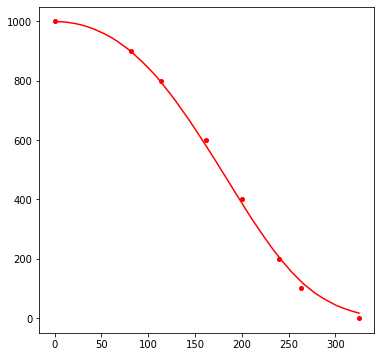

In [111]:
fig1,ax = plt.subplots(figsize=(6,6))
Tmax_C_F = 326
nind = 1000
#Plotting captive females
# Females captivity: new extraction 18.12.20
#plt.plot(0, 1.0,'ro')
#plt.plot(325*(37/148), 0.9,'ro')
#plt.plot(325*(52/148), 0.8,'ro')
#plt.plot(325*(73.5/148), 0.6,'ro')
#plt.plot(325*(91/148), 0.4,'ro')
#plt.plot(325*(109/148), 0.2,'ro')
#plt.plot(325*(120/148), 0.1,'ro')
#plt.plot(325*(148/148), 0.0,'ro')
 
X_C_F = [0, 325*(37/148),325*(52/148),325*(73.5/148),325*(91/148),325*(109/148),325*(120/148),325*(148/148)]
Y_C_F = [1.0,0.9,0.8,0.6,0.4,0.2,0.1,0.0]
Y_C_F = [nind * i for i in Y_C_F]
ax.plot(X_C_F,Y_C_F,'ro',markersize=4)

C1 = np.arange(0,Tmax_C_F,1,dtype = int)
ax.plot(C1,mean_mut_C_F,'r-')

In [100]:
#Fitting survivorship curves for captive male Telostylinus against Kawasaki et al (2018) data as a function of alpha and kappa
# Using same approach as for Frontinella
Tmax_C = 290 + 1
#kappa = 0.0165 Guide
#alpha = 0.0112 Guide
nind = 1000; 
nrepeats_mut = 100 #15 #100

X_C = np.round([290*(49/131.5),290*(61/131.5),290*(78/131.5),290*(91/131.5),290*(104/131.5),290*(112/131.5),290*(131.5/131.5)])
X_C = X_C.astype(int)
Y_C = [0.9,0.8,0.6,0.4,0.2,0.1,0.0]
Y_C = [nind * i for i in Y_C]
fit_C = []

for alpha in np.arange(0.00052,0.00066,0.00001):
    for kappa in np.arange(0.0165,0.0174,0.0001):
        H1_mut_C = np.zeros((nrepeats_mut,Tmax_C),dtype = int)
        for k in range(nrepeats_mut):
            s = np.ones((Tmax_C,nind),dtype = int); 
            for j in range(1,Tmax_C):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        if ran < alpha*(((1+kappa)**(j+1))-1):
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut_C[k,:] = np.sum(s, axis = 1)
        mean_mut_C_M = np.mean(H1_mut_C,axis = 0)
        
        # Square distance with data point and sum
        sum_square = (mean_mut_C_M[X_C[0]]-Y_C[0])**2 + (mean_mut_C_M[X_C[1]]-Y_C[1])**2 + (mean_mut_C_M[X_C[2]]-Y_C[2])**2 + (mean_mut_C_M[X_C[3]]-Y_C[3])**2 \
                    + (mean_mut_C_M[X_C[4]]-Y_C[4])**2 + (mean_mut_C_M[X_C[5]]-Y_C[5])**2 + (mean_mut_C_M[X_C[6]]-Y_C[6])**2 
        
        # Store in array
        fit_C.append([alpha,kappa,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_C, key=operator.itemgetter(2))
print(*best_fits[0:10], sep = "\n")

[0.0005700000000000001, 0.017299999999999996, 544.3922999999995]
[0.0005600000000000001, 0.017299999999999996, 600.0487000000012]
[0.0005700000000000001, 0.017199999999999997, 632.6622999999985]
[0.0005800000000000001, 0.017199999999999997, 635.8835000000006]
[0.0005900000000000001, 0.017099999999999997, 697.662300000001]
[0.0005800000000000001, 0.017099999999999997, 722.9501000000004]
[0.0005800000000000001, 0.017299999999999996, 841.2995999999997]
[0.0006000000000000002, 0.016999999999999998, 847.4325000000017]
[0.0005900000000000001, 0.017199999999999997, 852.8125000000032]
[0.0006000000000000002, 0.017099999999999997, 856.3022999999993]


nrepeats = 100: #old indexing
for alpha in np.arange(0.00061,0.00066,0.00001):
    for kappa in np.arange(0.0165,0.0169,0.0001):
[0.00063, 0.0168, 916.0706999999995]
[0.00062, 0.0168, 966.5286999999985]
[0.00064, 0.0168, 997.7717000000008]
[0.0006500000000000001, 0.0166, 1081.8828000000003]
[0.00064, 0.0167, 1115.4017999999999]
[0.00063, 0.0167, 1118.8210000000006]
[0.0006600000000000001, 0.0166, 1159.1097000000034]
[0.0006600000000000001, 0.0165, 1245.3133000000005]
[0.0006500000000000001, 0.0167, 1255.8387999999968]
[0.00064, 0.0166, 1260.0687000000007]

nrepeats  = 100: #new indexing
for alpha in np.arange(0.00052,0.00066,0.00001):
    for kappa in np.arange(0.0165,0.0174,0.0001):
[0.0005700000000000001, 0.017299999999999996, 544.3922999999995]
[0.0005600000000000001, 0.017299999999999996, 600.0487000000012]
[0.0005700000000000001, 0.017199999999999997, 632.6622999999985]
[0.0005800000000000001, 0.017199999999999997, 635.8835000000006]
[0.0005900000000000001, 0.017099999999999997, 697.662300000001]
[0.0005800000000000001, 0.017099999999999997, 722.9501000000004]
[0.0005800000000000001, 0.017299999999999996, 841.2995999999997]
[0.0006000000000000002, 0.016999999999999998, 847.4325000000017]
[0.0005900000000000001, 0.017199999999999997, 852.8125000000032]
[0.0006000000000000002, 0.017099999999999997, 856.3022999999993]

In [ ]:
fig1,ax = plt.subplots(figsize=(6,6))
Tmax_C_M = 290
nind = 1000

X_C_M = [0, 290*(49/131.5),290*(61/131.5),290*(78/131.5),290*(91/131.5),290*(104/131.5),290*(112/131.5),290*(131.5/131.5)]
Y_C_M = [1.0,0.9,0.8,0.6,0.4,0.2,0.1,0.0]
Y_C_M = [nind * i for i in Y_C_F]
ax.plot(X_C_M,Y_C_M,'ro',markersize=4)

C1 = np.arange(0,Tmax_C_M,1,dtype = int)
ax.plot(C1,mean_mut_C_M,'r-')

In [85]:
#Fitting survivorship curves wild female Telostylinus against Kawasaki et al (2008) data as a function of (1-epsilon)p_wt = prod_wt
#using the the first four data points, assuming that the mutant up to 60% cohort loss has negligible senescence 

Tmax_W = 100
nind = 1000; 
nrepeats_mut = 100 #100
#p_wt = 0.057 guide

#Females wild: old extraction - looks ok
#Old ratio 0.0:0.2 = 20/6.41 = 3.12; New ratio: =.0:0.2 = 46/14.5 = 3.17
#plt.plot(0, 1.0,'bo')
#plt.plot(0.45*100/20, 0.9,'bo')
#plt.plot(0.75*100/20, 0.8,'bo')
#plt.plot(1.94*100/20, 0.6,'bo')
#plt.plot(3.58*100/20, 0.4,'bo')
#plt.plot(6.41*100/20, 0.2,'bo')
#plt.plot(20*100/20, 0.0,'bo')

#Females wild: new extraction per 20 Dec 2020
#plt.plot(0, 1.0,'bo')
#plt.plot(100*2/45, 0.8,'bo')
#plt.plot(100*4/45, 0.6,'bo')
#plt.plot(100*8/45, 0.4,'bo')
#plt.plot(100*14/45, 0.2,'bo')
#plt.plot(100*45/45, 0.0,'bo')

X_W = np.round([100*2/45,100*4/45,100*8/45])
X_W = X_W.astype(int)
Y_W = [0.8,0.6,0.4]
Y_W = [nind * i for i in Y_W]
fit_W = []

for prod_wt in np.arange(0.046,0.051,0.0001): 
    # Cohort survivorship protected environment
    H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
    for k in range(nrepeats_mut):
        s = np.ones((Tmax_W,nind),dtype = int); 
        for j in range(1,Tmax_W):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < prod_wt:
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_mut_W[k,:] = np.sum(s, axis = 1)
    mean_mut_W = np.mean(H1_mut_W,axis = 0)

    # Square distance with data points and sum
    # Day i in mean_mut_W is index i, ie the i'th+1 element of mean_mut_W
    sum_square = (mean_mut_W[X_W[0]]-Y_W[0])**2 + (mean_mut_W[X_W[1]]-Y_W[1])**2 + (mean_mut_W[X_W[2]]-Y_W[2])**2 

    # Store in array
    fit_W.append([prod_wt,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_W, key=operator.itemgetter(1))
print(*best_fits[0:10], sep = "\n")

print()
prod_wt = best_fits[0][0]
for i in range(5):
    epsilon = 0.01*i
    p_wt = prod_wt/(1-epsilon)
    print('epsilon = ',epsilon,'p_wt = ',p_wt)

[0.05030000000000012, 736.959200000001]
[0.05080000000000014, 806.8661999999987]
[0.05060000000000013, 810.0948999999985]
[0.05090000000000014, 857.3825000000003]
[0.050400000000000125, 869.2693999999974]
[0.05050000000000013, 973.9909999999999]
[0.050700000000000134, 997.1848999999962]
[0.05020000000000012, 999.7549000000029]
[0.050000000000000114, 1051.2442999999992]
[0.05010000000000012, 1091.566799999999]

epsilon =  0.0 p_wt =  0.05030000000000012
epsilon =  0.01 p_wt =  0.050808080808080934
epsilon =  0.02 p_wt =  0.05132653061224502
epsilon =  0.03 p_wt =  0.05185567010309291
epsilon =  0.04 p_wt =  0.05239583333333346


nrepeats = 100:
for prod_wt in np.arange(0.046,0.051,0.0001)
[0.05030000000000012, 736.959200000001]
[0.05080000000000014, 806.8661999999987]
[0.05060000000000013, 810.0948999999985]
[0.05090000000000014, 857.3825000000003]
[0.050400000000000125, 869.2693999999974]
[0.05050000000000013, 973.9909999999999]
[0.050700000000000134, 997.1848999999962]
[0.05020000000000012, 999.7549000000029]
[0.050000000000000114, 1051.2442999999992]
[0.05010000000000012, 1091.566799999999]

epsilon =  0.0 p_wt =  0.05030000000000012
epsilon =  0.01 p_wt =  0.050808080808080934
epsilon =  0.02 p_wt =  0.05132653061224502
epsilon =  0.03 p_wt =  0.05185567010309291
epsilon =  0.04 p_wt =  0.05239583333333346

In [90]:
#Fitting survivorship curves wild male Telostylinus against Kawasaki et al (2008) data as a function of (1-epsilon)p_wt = prod_wt
#using the the first three data points, assuming that the mutant up to 60% cohort loss has negligible senescence 

Tmax_W = 53 # based on new extraction male=0: 24 mm, female=0: 45 mm 24/45= 0.53
nind = 1000; 
nrepeats_mut = 100 #50 #100
#p_wt = 0.057 guide

#Males wild: old extraction - looks ok
#plt.plot(0, 1.0,'go')
#plt.plot(0.746*55/11, 0.9,'go')
#plt.plot(1.34*55/11, 0.8,'go')
#plt.plot(2.68*55/11, 0.6,'go')
#plt.plot(4.0*55/11, 0.4,'go')
#plt.plot(5.6*55/11, 0.2,'go')
#plt.plot(7.02*55/11, 0.1,'go')
#plt.plot(11*55/11, 0.0,'go') 

#Males wild: new extraction - Dec 2020
#plt.plot(0, 1.0,'go')
#plt.plot(53*3/24, 0.8,'go')
#plt.plot(53*5/24, 0.6,'go')
#plt.plot(53*8.5/24, 0.4,'go')
#plt.plot(53*12/24, 0.2,'go')
#plt.plot(53*24/24, 0.0,'go') 

X_W = np.round([53*3/24,53*5/24,53*8.5/24])
X_W = X_W.astype(int)
Y_W = [0.8,0.6,0.4]
Y_W = [nind * i for i in Y_W]
fit_W = []

for prod_wt in np.arange(0.041,0.046,0.0001): 
    # Cohort survivorship protected environment
    H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
    for k in range(nrepeats_mut):
        s = np.ones((Tmax_W,nind),dtype = int); 
        for j in range(1,Tmax_W):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < prod_wt:
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_mut_W[k,:] = np.sum(s, axis = 1)
    mean_mut_W = np.mean(H1_mut_W,axis = 0)

    # Square distance with data points and sum
    sum_square = (mean_mut_W[X_W[0]]-Y_W[0])**2 + (mean_mut_W[X_W[1]]-Y_W[1])**2 + (mean_mut_W[X_W[2]]-Y_W[2])**2

    # Store in array
    fit_W.append([prod_wt,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_W, key=operator.itemgetter(1))
print(*best_fits[0:10], sep = "\n")

print()
prod_wt = best_fits[0][0]
for i in range(5):
    epsilon = 0.01*i
    p_wt = prod_wt/(1-epsilon)
    print('epsilon = ',epsilon,'p_wt = ',p_wt)

[0.04350000000000007, 5445.934100000005]
[0.04380000000000008, 5462.077399999995]
[0.043900000000000085, 5528.599200000004]
[0.04370000000000008, 5537.241299999996]
[0.04300000000000006, 5551.665299999997]
[0.04330000000000007, 5554.9489999999905]
[0.044600000000000105, 5568.0520999999935]
[0.044300000000000096, 5582.726799999994]
[0.04260000000000005, 5599.306100000008]
[0.04470000000000011, 5603.296300000001]

epsilon =  0.0 p_wt =  0.04350000000000007
epsilon =  0.01 p_wt =  0.043939393939394014
epsilon =  0.02 p_wt =  0.04438775510204089
epsilon =  0.03 p_wt =  0.044845360824742345
epsilon =  0.04 p_wt =  0.045312500000000075


nrepeats = 100:
for prod_wt in np.arange(0.049,0.0525,0.0001): 
[0.049, 10065.542499999998]
[0.049100000000000005, 10238.27089999999]
[0.04930000000000001, 10482.399399999993]
[0.04920000000000001, 10667.817799999997]
[0.04940000000000001, 10852.018200000008]
[0.04990000000000003, 10936.890199999989]
[0.04970000000000002, 11128.770199999994]
[0.04960000000000002, 11193.083999999992]
[0.049800000000000025, 11238.720899999995]
[0.049500000000000016, 11339.504100000006]

epsilon =  0.0 p_wt =  0.049
epsilon =  0.01 p_wt =  0.049494949494949494
epsilon =  0.02 p_wt =  0.05
epsilon =  0.03 p_wt =  0.050515463917525774
epsilon =  0.04 p_wt =  0.05104166666666667

nrepeats = 100:
for prod_wt in np.arange(0.046,0.0491,0.0001): 
[0.046, 6197.0760999999975]
[0.0461, 6565.265299999993]
[0.046200000000000005, 6739.069899999992]
[0.04640000000000001, 6758.675000000008]
[0.04630000000000001, 6768.6429000000035]
[0.046900000000000025, 6806.758900000007]
[0.046500000000000014, 6898.294700000008]
[0.046600000000000016, 7070.447400000008]
[0.04670000000000002, 7141.912100000009]
[0.047300000000000036, 7449.628500000003]

epsilon =  0.0 p_wt =  0.046
epsilon =  0.01 p_wt =  0.046464646464646465
epsilon =  0.02 p_wt =  0.04693877551020408
epsilon =  0.03 p_wt =  0.04742268041237113
epsilon =  0.04 p_wt =  0.04791666666666667

nrepeats = 100:
for prod_wt in np.arange(0.041,0.046,0.0001): 
[0.04350000000000007, 5445.934100000005]
[0.04380000000000008, 5462.077399999995]
[0.043900000000000085, 5528.599200000004]
[0.04370000000000008, 5537.241299999996]
[0.04300000000000006, 5551.665299999997]
[0.04330000000000007, 5554.9489999999905]
[0.044600000000000105, 5568.0520999999935]
[0.044300000000000096, 5582.726799999994]
[0.04260000000000005, 5599.306100000008]
[0.04470000000000011, 5603.296300000001]

epsilon =  0.0 p_wt =  0.04350000000000007
epsilon =  0.01 p_wt =  0.043939393939394014
epsilon =  0.02 p_wt =  0.04438775510204089
epsilon =  0.03 p_wt =  0.044845360824742345
epsilon =  0.04 p_wt =  0.045312500000000075

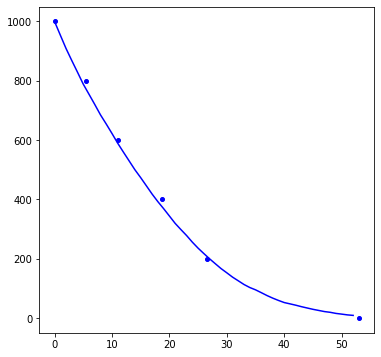

In [179]:
#Calibrating extra mortality term for wild males
Tmax_W_M = 53
nind = 1000
p_wt_mut_M = 0.0453 #epsilon = 0.04 value
alpha_M = 0.00057
kappa_M = 0.0173
nrepeats = 10
epsilon = 0.04
delta = 0.0001 
e = 1.8 #2.0 #1.5 # 1.5
life_sucks = 1

steepness = 0.95
x = np.arange(0,Tmax,1,dtype = int)
life_sucks = 1.0 - steepness*x/Tmax_W_M

# Cohort survivorship male mutant wild
H1_mut_W_M = np.zeros((nrepeats,Tmax_W_M),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_W_M,nind),dtype = int); 
    for j in range(1,Tmax_W_M):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                #if ran < (1-epsilon_M)*(p_wt_mut_M + delta*j**e) + alpha_M*(((1+kappa_M)**(j+1))-1):
                if ran < (1-epsilon_M)*p_wt_mut_M + (alpha_M*(((1+kappa_M)**(j+1))-1))+(delta*j**e): #**life_sucks[j]:
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_W_M[k,:] = np.sum(s, axis = 1)

mean_mut_W_M = np.mean(H1_mut_W_M,axis = 0)

fig1,ax = plt.subplots(figsize=(6,6))


X_W_M = [0,53*2.5/24,53*5/24,53*8.5/24,53*12/24,53*24/24]
Y_W_M = [1.0,0.8,0.6,0.4,0.2,0.0]
Y_W_M = [nind * i for i in Y_W_M]
ax.plot(X_W_M,Y_W_M,'bo',markersize=4)
                                                 
C4 = np.arange(0,Tmax_W_M,1,dtype = int)
ax.plot(C4,mean_mut_W_M,'b-')

(1-epsilon_M)*p_wt_mut_M + (alpha_M*(((1+kappa_M)**(j+1))-1))+(delta*j**e) says that the males are exposed to both the strain associated with the reproductive strategy and the enhanced effect of somatic damage in the wild, i.e. the combination of exhaustion and the effect of somatic damage enhancing the effect of exhaustion --> increased predation and risk of physiological collapse

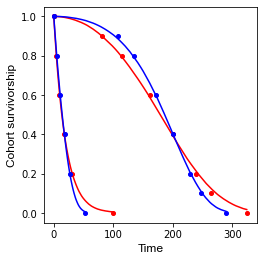

In [134]:
#Calculating survivorship curves for captive and wild mutant Telostylinus males and females
Tmax_C_F = 325
Tmax_C_M = 290
Tmax_W_F = 100
Tmax_W_M = 53

nind = 1000; 
nrepeats = 100

epsilon_F = 0.04
epsilon_M = 0.04

alpha_F = 0.00287
kappa_F = 0.00842

alpha_M = 0.00057
kappa_M = 0.0173

p_wt_mut_F = 0.05239 #epsilon = 0.04 value
p_wt_mut_M = 0.0453 #epsilon = 0.04 value

delta = 0.0001 #0.04
e = 1.8 #2.0 #1.5 # 1.5
life_sucks = NBNB


# Cohort survivorship protected environment females
H1_mut_C_F = np.zeros((nrepeats,Tmax_C_F),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_C_F,nind),dtype = int); 
    for j in range(1,Tmax_C_F):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha_F*(((1+kappa_F)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_C_F[k,:] = np.sum(s, axis = 1)

mean_mut_C_F = np.mean(H1_mut_C_F,axis = 0)

# Cohort survivorship protected environment males
H1_mut_C_M = np.zeros((nrepeats,Tmax_C_M),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_C_M,nind),dtype = int); 
    for j in range(1,Tmax_C_M):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha_M*(((1+kappa_M)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_C_M[k,:] = np.sum(s, axis = 1)

mean_mut_C_M = np.mean(H1_mut_C_M,axis = 0)

# Cohort survivorship female mutant wild
H1_mut_W_F = np.zeros((nrepeats,Tmax_W_F),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_W_F,nind),dtype = int); 
    for j in range(1,Tmax_W_F):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < (1-epsilon_F)*p_wt_mut_F + alpha_F*(((1+kappa_F)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_W_F[k,:] = np.sum(s, axis = 1)

mean_mut_W_F = np.mean(H1_mut_W_F,axis = 0)

# Cohort survivorship male mutant wild
H1_mut_W_M = np.zeros((nrepeats,Tmax_W_M),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_W_M,nind),dtype = int); 
    for j in range(1,Tmax_W_M):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < (1-epsilon_M)*p_wt_mut_M + delta*j**e + alpha_M*(((1+kappa_M)**(j+1))-1):
                #if ran < (1-epsilon_M)*p_wt_mut_M + (alpha_M*(((1+kappa_M)**(j+1))-1))**life_sucks:
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_W_M[k,:] = np.sum(s, axis = 1)

mean_mut_W_M = np.mean(H1_mut_W_M,axis = 0)


# Recording
#print('Mean number of mutant individuals in captvity left at Tmax_C: ',mean_mut_C[Tmax_C-1])
#print('Mean number of mutant individuals left at Tmax_W: ',mean_mut_W[Tmax_W-1])
#print('Mean number of wildtype individuals left at Tmax_W: ',mean_wt[Tmax_W-1])
#print('Mean number of wildtype individuals left at Tmax_wt: ',mean_wt[Tmax_WT-1])

# Normalize + calculate stds
mean_mut_C_F = mean_mut_C_F*(1/nind)
mean_mut_C_M = mean_mut_C_M*(1/nind)
#std_mut_C = np.std(H1_mut_C*(1/nind),axis = 0)
mean_mut_W_F = mean_mut_W_F*(1/nind)
mean_mut_W_M = mean_mut_W_M*(1/nind)
#std_mut_W = np.std(H1_mut_W*(1/nind),axis = 0)
#mean_wt = mean_wt*(1/nind)
#std_wt = np.std(H1_wt*(1/nind),axis = 0)

# Plotting
fig,ax = plt.subplots(figsize=(6,6))
#plt.plot(C1,mean_mut_C,'r-')
#plt.fill_between(range(Tmax_C), mean_mut_C-3.0*std_mut_C, mean_mut_C+3.0*std_mut_C, color='pink', alpha = 0.5)
#plt.plot(C2,mean_mut_W,'b-')
#plt.fill_between(range(Tmax_WT), mean_wt-3.0*std_wt, mean_wt+3.0*std_wt, color = 'lightblue', alpha = 0.5);

#ax.fill_between(range(Tmax_C), mean_mut_C-3.0*std_mut_C, mean_mut_C+3.0*std_mut_C, color='pink', alpha = 0.5)


#Plotting captive females
# Females captivity: new extraction 18.12.20
#plt.plot(0, 1.0,'ro')
#plt.plot(325*(37/148), 0.9,'ro')
#plt.plot(325*(52/148), 0.8,'ro')
#plt.plot(325*(73.5/148), 0.6,'ro')
#plt.plot(325*(91/148), 0.4,'ro')
#plt.plot(325*(109/148), 0.2,'ro')
#plt.plot(325*(120/148), 0.1,'ro')
#plt.plot(325*(148/148), 0.0,'ro')
 
X_C_F = [0,325*(37/148),325*(52/148),325*(73.5/148),325*(91/148),325*(109/148),325*(120/148),325*(148/148)]
Y_C_F = [1.0,0.9,0.8,0.6,0.4,0.2,0.1,0.0]
ax.plot(X_C_F,Y_C_F,'ro',markersize=4)

C1 = np.arange(0,Tmax_C_F,1,dtype = int)
ax.plot(C1,mean_mut_C_F,'r-')
#plt.plot(C3,mean_wt,'g-')
#ax.fill_between(range(Tmax_WT), mean_wt-3.0*std_wt, mean_wt+3.0*std_wt, color = 'lightblue', alpha = 0.5);

#Plotting captive males
# Males captivity: new extraction 18.12.20
#plt.plot(0, 1.0,'ro')
#plt.plot(290*(49/131.5), 0.9,'ro')
#plt.plot(290*(61/131.5), 0.8,'ro')
#plt.plot(290*(78/131.5), 0.6,'ro')
#plt.plot(290*(91/131.5), 0.4,'ro')
#plt.plot(290*(104/131.5), 0.2,'ro')
#plt.plot(290*(112/131.5), 0.1,'ro')
#plt.plot(290*(131.5/131.5), 0.0,'ro')

X_C_M = [0,290*(49/131.5),290*(61/131.5),290*(78/131.5),290*(91/131.5),290*(104/131.5),290*(112/131.5),290*(131.5/131.5)]
Y_C_M = [1.0,0.9,0.8,0.6,0.4,0.2,0.1,0.0]
ax.plot(X_C_M,Y_C_M,'bo',markersize=4)

C2 = np.arange(0,Tmax_C_M,1,dtype = int)
ax.plot(C2,mean_mut_C_M,'b-')

#Plotting wild females
#Females wild: new extraction per 20 Dec 2020
#plt.plot(0, 1.0,'bo')
#plt.plot(100*2/45, 0.8,'bo')
#plt.plot(100*4/45, 0.6,'bo')
#plt.plot(100*8/45, 0.4,'bo')
#plt.plot(100*14/45, 0.2,'bo')
#plt.plot(100*45/45, 0.0,'bo')

X_W_F = [0,100*2/45,100*4/45,100*8/45,100*14/45,100*45/45]
Y_W_F = [1.0,0.8,0.6,0.4,0.2,0.0]
ax.plot(X_W_F,Y_W_F,'ro',markersize=4)

C3 = np.arange(0,Tmax_W_F,1,dtype = int)
ax.plot(C3,mean_mut_W_F,'r-')

#Plotting wild males
#Males wild: new extraction per 20 Dec 2020
#plt.plot(0, 1.0,'go')
#plt.plot(53*3/24, 0.8,'go')
#plt.plot(53*5/24, 0.6,'go')
#plt.plot(53*8.5/24, 0.4,'go')
#plt.plot(53*12/24, 0.2,'go')
#plt.plot(53*24/24, 0.0,'go') 
                                                 
X_W_M = [0,53*2.5/24,53*5/24,53*8.5/24,53*12/24,53*24/24]
Y_W_M = [1.0,0.8,0.6,0.4,0.2,0.0]
ax.plot(X_W_M,Y_W_M,'bo',markersize=4)
                                                 
C4 = np.arange(0,Tmax_W_M,1,dtype = int)
ax.plot(C4,mean_mut_W_M,'b-')

#plt.xlabel("Time",fontsize = 14)
#plt.ylabel("Cohort survivorship",fontsize = 14);
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont)
ax.set_ylabel("Cohort survivorship",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)

plt.savefig('RA_fig1_Telostylinus.pdf', dpi = 600, bbox_inches="tight");

# Figure 2

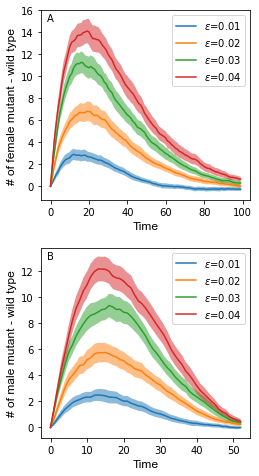

In [148]:
#Calculates the difference in number of survivors between wild type and mutant across the time span 
# - alternative strategy where both mutant and the wildtype uses the same ran value, such that one can 
# calculate a meaningful standard deviation for this difference 
nind = 1000
nrepeats = 100 #10000

Tmax_W_F = 100
Tmax_W_M = 53

alpha_F = 0.00287
kappa_F = 0.00842

alpha_M = 0.00057
kappa_M = 0.0173

epsilon = np.array([0.01, 0.02, 0.03, 0.04])
p_wt_F = np.array([0.0508,0.0513,0.05185,0.05239])
p_wt_M = np.array([0.04393,0.044387,0.044845,0.04531])

delta = 0.0001 #0.04
e = 1.8 #2.0 #1.5 # 1.5

    
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(6,6))

# Females
Tmax = Tmax_W_F
p_wt = p_wt_F 
diff_mutwt = np.zeros((nrepeats,Tmax))
C = np.arange(0,Tmax,1,dtype = int)
for m in range(4):
    H1_mut = np.zeros((nrepeats,Tmax),dtype = int)
    H1_wt = np.zeros((nrepeats,Tmax),dtype = int)
    for k in range(nrepeats):
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        H1_mut[k,:] = np.sum(s1, axis = 1)
    
        H1_wt[k,:] = np.sum(s2, axis = 1)
    
        diff_mutwt[k,:] = H1_mut[k,:] - H1_wt[k,:]
                
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
    
    if m==0:
        l1, = ax1.plot(C,mean_diff)
        ax1.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==1:
        l2, = ax1.plot(C,mean_diff)
        ax1.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==2:
        l3, = ax1.plot(C,mean_diff)
        ax1.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==3:
        l4, = ax1.plot(C,mean_diff)
        ax1.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)

ax1.legend((l1,l2,l3,l4),('$\epsilon$=0.01', '$\epsilon$=0.02', '$\epsilon$=0.03','$\epsilon$=0.04'));
afont = {'fontname':'Arial'}
ax1.set_xlabel("Time",fontsize = 12,**afont);
ax1.set_ylabel("# of female mutant - wild type",fontsize = 12,**afont);


# Males
Tmax = Tmax_W_M
p_wt = p_wt_M 
diff_mutwt = np.zeros((nrepeats,Tmax))
C = np.arange(0,Tmax,1,dtype = int)
for m in range(4):
    H1_mut = np.zeros((nrepeats,Tmax),dtype = int)
    H1_wt = np.zeros((nrepeats,Tmax),dtype = int)
    for k in range(nrepeats):
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + delta*j**e + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m] + delta*j**e:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        H1_mut[k,:] = np.sum(s1, axis = 1)
    
        H1_wt[k,:] = np.sum(s2, axis = 1)
        
        diff_mutwt[k,:] = H1_mut[k,:] - H1_wt[k,:]
                
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
    
    if m==0:
        l1, = ax2.plot(C,mean_diff)
        ax2.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==1:
        l2, = ax2.plot(C,mean_diff)
        ax2.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==2:
        l3, = ax2.plot(C,mean_diff)
        ax2.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==3:
        l4, = ax2.plot(C,mean_diff)
        ax2.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)

ax2.legend((l1,l2,l3,l4),('$\epsilon$=0.01', '$\epsilon$=0.02', '$\epsilon$=0.03','$\epsilon$=0.04'));
afont = {'fontname':'Arial'}
ax2.set_xlabel("Time",fontsize = 12,**afont);
ax2.set_ylabel("# of male mutant - wild type",fontsize = 12,**afont);


x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

#def get_axis_limits(ax, scale=.95):
    #return ax.get_xlim()[0]*1.1, ax.get_ylim()[1]*scale

#ax1.annotate('A', xy=get_axis_limits(ax1))
#ax2.annotate('B', xy=get_axis_limits(ax2))

ax1.annotate("A", xy=(0.03, 0.94), xycoords="axes fraction")
ax2.annotate("B", xy=(0.03, 0.94), xycoords="axes fraction")

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 6.84)
plt.savefig('RA_fig2_Telostylinus.pdf', dpi = 600, bbox_inches="tight");

In [149]:
#Calculates the difference in number of survivors between female and male wild type and mutant across the time span 
# by integrating the areas under the survivirship curves where both mutant and the wildtype uses the same ran value, 

from numpy import trapz

nind = 1000
nrepeats =  100

Tmax_W_F = 100
Tmax_W_M = 53

alpha_F = 0.00287
kappa_F = 0.00842

alpha_M = 0.00057
kappa_M = 0.0173

epsilon = np.array([0, 0.01, 0.02, 0.03, 0.04])
p_wt_F = np.array([0.0503,0.0508,0.0513,0.05185,0.05239])
p_wt_M = np.array([0.0435,0.04393,0.044387,0.044845,0.04531])

for z in range(2):
    if z == 0:
        p_wt = p_wt_F
        alpha = alpha_F
        kappa = kappa_F
        Tmax = Tmax_W_F
        delta = 0
        e = 0
    if z == 1:
        p_wt = p_wt_M
        alpha = alpha_M
        kappa = kappa_M
        Tmax = Tmax_W_M
        delta = 0.0001
        e = 1.8
    area_mut = np.zeros((5,nrepeats))
    area_wt = np.zeros((5,nrepeats))
    for m in range(5):

        H1_mut = np.zeros((nrepeats,Tmax),dtype = int)
        H1_wt = np.zeros((nrepeats,Tmax),dtype = int)

        for k in range(nrepeats):
            s1 = np.ones((Tmax,nind),dtype = int)
            s2 = np.ones((Tmax,nind),dtype = int); 
            for j in range(1,Tmax):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s1[j-1,i] == 1:
                        if ran < (1-epsilon[m])*p_wt[m] + delta*j**e+ alpha*(((1+kappa)**(j+1))-1):
                            s1[j,i] = 0
                    if s1[j-1,i] == 0:
                        s1[j,i] = 0

                    if s2[j-1,i] == 1:
                        if ran < p_wt[m]+delta*j**e:
                            s2[j,i] = 0
                    if s2[j-1,i] == 0:
                        s2[j,i] = 0

            H1_mut[k,:] = np.sum(s1, axis = 1)
            y = H1_mut[k,:]
            area_mut[m,k] = trapz(y, dx=1)
            #H1_mut_all[counter1-1,:] = np.sum(s1, axis = 1)

            H1_wt[k,:] = np.sum(s2, axis = 1)
            y = H1_wt[k,:]
            area_wt[m,k] = trapz(y, dx=1)
            #H1_wt_all[counter2-1,:] = np.sum(s2, axis = 1)

    #Calculate the percentage of cases where the mutant has a larger area than the stipulated wild type
    Z = np.subtract(area_mut,area_wt)
    Y = Z.transpose()
    G = np.count_nonzero(Y>0,axis=0)
    R = G*100/nrepeats
    if z == 0:
        print('Percentage female mutant wins: ',R)
        print('Number of female mutant winning instances:', np.count_nonzero(Y>0,axis=0))
        print()
    if z == 1:
        print('Percentage male mutant wins: ',R)
        print('Number of male mutant winning instances:', np.count_nonzero(Y>0,axis=0))

Percentage female mutant wins:  [  0.  39.  99. 100. 100.]
Number of female mutant winning instances: [  0  39  99 100 100]

Percentage male mutant wins:  [  0. 100. 100. 100. 100.]
Number of male mutant winning instances: [  0 100 100 100 100]
